# Principal Component Analysis

-----
-----

Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.*

-----
-----

# Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(filepath_or_buffer='../DATA/digits.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


No data is missing and the lable is named number_lable. Let's isolate the pixes.

In [5]:
pixel = df.drop(columns='number_label')


Let's grab a single row value and display the image

In [6]:
zero_pixel_val  = pixel.values[0].reshape(8,8)

<Axes: >

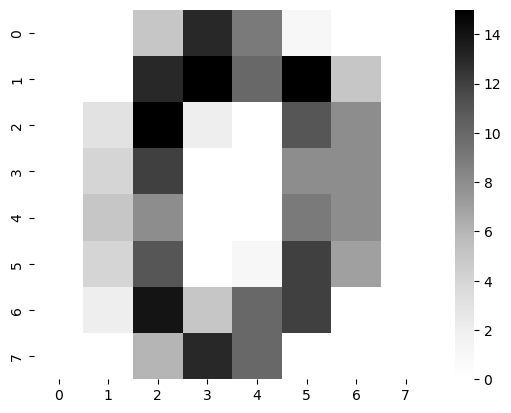

In [7]:
sns.heatmap(data=zero_pixel_val, cmap='Greys')


## Scaling the data 

In [8]:
from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_pixel = scaler.fit_transform(pixel)

## Principle Component Analysis 

Let's project the data 2D linear manifold in feature space to see the sepration of the data

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [10]:
pca.fit(scaled_pixel)

PCA(n_components=2)

In [11]:
# How much vairaince is explained
pca.explained_variance_ratio_.sum()

0.21594970497389793

In [12]:
projected_2d = pca.transform(scaled_pixel)

Let's plot this 2d manifold and with a hue of the various number

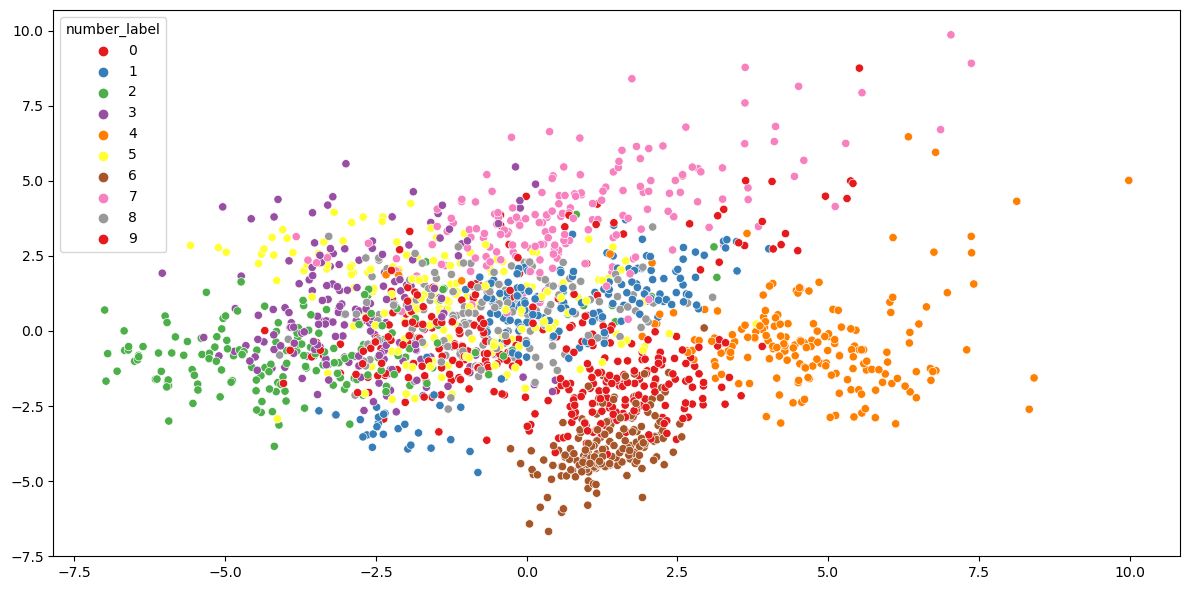

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=projected_2d[:,0], y=projected_2d[:,1] ,hue=df['number_label'] , palette='Set1')
plt.tight_layout()

Seems like 5 and 8 are clustered together. Need more sample of those for the traning.

Let's project onto a 3D manifold and see the results

### 3D projection

In [14]:
pca_3d = PCA(n_components=3)

In [15]:
projected_3d  = pca_3d.fit_transform(scaled_pixel)

In [16]:
pca_3d.explained_variance_ratio_.sum()

0.3003938538817521

In [17]:
%matplotlib qt
fig = plt.figure(figsize=(12,8), dpi=150)
ax = fig.add_axes(111, projection='3d')
ax.scatter3D(projected_3d[:,0],projected_3d[:,1] , projected_3d[:,2], c=df['number_label'] );
